# Descision Tree

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
import tree
import tree_plotter

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
df = pd.read_csv('./data/watermelon2.0.csv')

df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,否


## Remove column

In [3]:
df = df.drop('编号', axis=1)

## Data mappings

In [4]:
feature_labels = list(df.columns)[:-1]
feature_mappings = {'色泽': {0: '青绿', 1: '乌黑', 2: '浅白'},
                    '根蒂': {0: '蜷缩', 1: '稍蜷', 2: '硬挺'},
                    '敲声': {0: '清脆', 1: '浊响', 2: '沉闷'},
                    '纹理': {0: '清晰', 1: '稍糊', 2: '模糊'},
                    '脐部': {0: '凹陷', 1: '稍凹', 2: '平坦'},
                    '触感': {0: '软粘', 1: '硬滑'}}
class_mappings = {0: '坏瓜', 1: '好瓜'}

for key1 in feature_mappings:
    feature_map = feature_mappings[key1]
    mapping = {}
    for key2 in feature_map:
        mapping[feature_map[key2]] = key2
    df[key1] = df[key1].map(mapping)

mapping = {'否': 0, '是': 1}
df['好瓜'] = df['好瓜'].map(mapping)

df

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,0,0,1,0,0,1,1
1,1,0,2,0,0,1,1
2,1,0,1,0,0,1,1
3,0,0,2,0,0,1,1
4,2,0,1,0,0,1,1
5,0,1,1,0,1,0,1
6,1,1,1,1,1,0,1
7,1,1,1,0,1,1,1
8,1,1,2,1,1,1,0
9,0,2,0,0,2,0,0


In [5]:
feature_mappings

{'敲声': {0: '清脆', 1: '浊响', 2: '沉闷'},
 '根蒂': {0: '蜷缩', 1: '稍蜷', 2: '硬挺'},
 '纹理': {0: '清晰', 1: '稍糊', 2: '模糊'},
 '脐部': {0: '凹陷', 1: '稍凹', 2: '平坦'},
 '色泽': {0: '青绿', 1: '乌黑', 2: '浅白'},
 '触感': {0: '软粘', 1: '硬滑'}}

In [6]:
class_mappings

{0: '坏瓜', 1: '好瓜'}

## Convert dataframe to array

In [7]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

## Construct Decision Tree

In [8]:
dt = tree.create_decision_tree(data, target, feature_labels, feature_mappings, class_mappings)

dt

{'纹理': {'模糊': '坏瓜',
  '清晰': {'根蒂': {'硬挺': '坏瓜',
    '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '好瓜', '软粘': '坏瓜'}}, '青绿': '好瓜'}},
    '蜷缩': '好瓜'}},
  '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}}}}

## Visualize tree

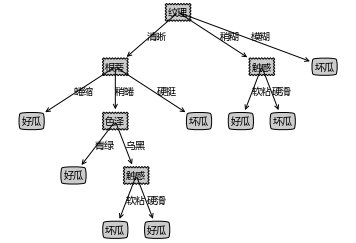

In [9]:
tree_plotter.create_plot(dt)